Chapter 15

# 从邻接矩阵到有向图
《线性代数》 | 鸢尾花书：数学不难

这段代码从数学角度出发，完整展示了如何利用一个邻接矩阵构造一个有向图（Directed Graph），并进行可视化和矩阵抽取。在此过程中，它隐含了对图结构 $G = (V, E)$ 的建模，其中 $V$ 是节点集合，$E$ 是有向边的集合。下面详细从数学视角展开说明。

---

首先，代码中手动定义了一个 $4 \times 4$ 的邻接矩阵：

$$
A = \begin{bmatrix}
0 & 1 & 1 & 0 \\
1 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
1 & 0 & 1 & 0 \\
\end{bmatrix}
$$

这个矩阵是一个**非对称矩阵**，即 $A \ne A^\top$，说明所表示的是一个**有向图（Directed Graph）**。矩阵 $A_{ij} = 1$ 表示存在一条从节点 $i$ 指向节点 $j$ 的边。比如 $A_{0,1} = 1$ 意味着从节点 0 指向节点 1 有一条边；$A_{1,0} = 1$ 则表示它是互相连通的，但并不表示所有边都成对出现。

我们可以把这个邻接矩阵看作一个从集合 $\{0, 1, 2, 3\}$ 到自己映射的函数 $A: V \times V \to \{0,1\}$，定义每对节点是否存在有向边。

---

接下来，用 `nx.DiGraph(adjacency_matrix)` 创建了一个有向图对象。此时，图的边集合 $E$ 就由矩阵 $A$ 的非零元素定义：

$E = \{ (i, j) \mid A_{ij} = 1 \}$。

然后用映射字典将节点 $0, 1, 2, 3$ 分别重命名为 `'a', 'b', 'c', 'd'`，这相当于给图的每个顶点赋予更直观的标签。也就是说，原本的节点 $0$ 被标记为 `'a'`，以此类推。

---

节点的布局位置由一个字典 `pos` 定义，明确指定了每个节点在二维平面上的位置，这与数学上常见的图嵌入（Graph Embedding）思想类似：我们把离散结构嵌入到二维欧几里得空间中便于观察。

随后调用 `nx.draw_networkx()` 进行可视化。每个节点都被绘制在平面上，它们之间的有向边用箭头或连接线显示出方向，从而清晰表达出邻接关系。

---

最后，调用 `nx.adjacency_matrix(directed_G).toarray()` 将图的邻接结构重新转换为 NumPy 数组形式的矩阵 $A$，这一步本质上是把图从结构对象重新映射为代数对象，即从图 $G$ 恢复邻接矩阵 $A$：

$$
A_{ij} = \begin{cases}
1, & \text{如果存在一条从节点 } i \text{ 到节点 } j \text{ 的边} \\
0, & \text{否则}
\end{cases}
$$

这使我们可以对图进行代数分析，比如求特征值分解、计算图谱、拉普拉斯矩阵、传播路径等，建立从图论结构到线性代数操作的桥梁。

---

总结一句话：  
> 这段代码以邻接矩阵为出发点，构造了一个有向图，通过可视化展现其结构，并重新提取邻接矩阵以便后续代数处理，从而实现图论与矩阵代数之间的互通。

## 初始化

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

## 定义邻接矩阵

In [4]:
adjacency_matrix = np.array([[0, 1, 1, 0],
                             [1, 0, 1, 0],
                             [0, 0, 0, 1],
                             [1, 0, 1, 0]])

## 创建有向图

In [7]:
directed_G = nx.DiGraph(adjacency_matrix, nodetype=int)
# 用邻接矩阵创建无向图

# 构造节点映射
mapping = {0: 'a', 1: 'b', 2: 'c', 3: 'd'}

# 重命名节点
directed_G = nx.relabel_nodes(directed_G, mapping)

## 定义节点坐标

In [9]:
pos = {'a':[0, 0], 
       'b':[1, 0],
       'c':[1, 1],
       'd':[0, 1]}

## 可视化

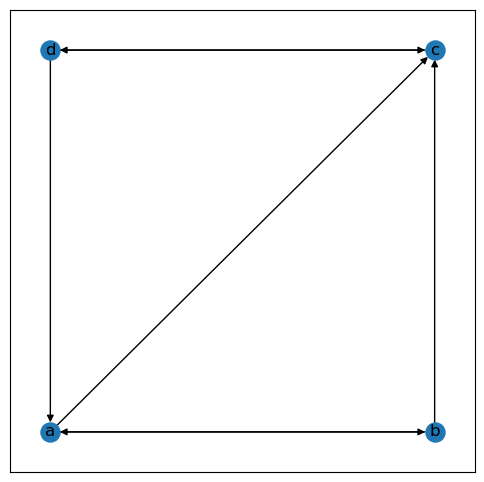

In [11]:
plt.figure(figsize = (6,6))
nx.draw_networkx(directed_G, pos = pos, node_size = 188, with_labels=True)

## 邻接矩阵

In [15]:
A = nx.adjacency_matrix(directed_G).toarray()
A

array([[0, 1, 1, 0],
       [1, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 1, 0]])

作者	**生姜DrGinger**  
脚本	**生姜DrGinger**  
视频	**崔崔CuiCui**  
开源资源	[**GitHub**](https://github.com/Visualize-ML)  
平台	[**油管**](https://www.youtube.com/@DrGinger_Jiang)		
		[**iris小课堂**](https://space.bilibili.com/3546865719052873)		
		[**生姜DrGinger**](https://space.bilibili.com/513194466)  